# установка библиотек

In [35]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Импортирую библиотеки 

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score


from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score,  classification_report

загружаю csv файл чтобы посмотреть что там

In [37]:
data1=pd.read_csv('/home/user1/Desktop/СайтыЗлоумышлиников/Сессия3/sample.csv')
data1

,session_id,target
0,1,0.948255
1,2,0.682483
2,3,0.502855
3,4,0.345556
4,5,0.889428
...,...,...
82792,82793,0.585216
82793,82794,0.621074
82794,82795,0.651144
82795,82796,0.319917


загружаю прошлую сессию

In [38]:
data=pd.read_csv('/home/user1/Desktop/Сессия 1/Data/выборка.csv')
data.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,no info,no info,no info,no info,no info,no info,no info,...,no info,no info,no info,no info,no info,no info,no info,no info,no info,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


# 3.1 Сравнение нескольких алгоритмов на сессиях

делаю перекадировку 

In [39]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

data, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
data.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,129923,15821,233597,15759,230761,15775,228188,15840,...,223712,15772,221851,15854,219987,15724,218006,15675,216169,0
1,2,890,135309,15504,133727,11316,132077,15446,130535,15519,...,127956,11281,126861,11325,125762,2565,124582,2555,123511,0
2,3,14769,61632,11479,60811,2413,59945,2352,59151,10873,...,57848,2370,57298,2360,56780,2383,56229,2351,55689,0
3,4,782,199859,14654,197530,14591,195306,14596,193234,14667,...,189536,14602,187999,14651,186420,14556,184871,14521,183293,0
4,5,22,154140,3665,152413,3619,150566,3629,148873,3623,...,145929,3568,144726,3614,143468,3629,142193,3643,140956,0


присваиваю переменной X значение data

In [40]:
X = data

присваиваю переменной Y значение session_id

In [41]:
Y = data['target']

разделяю данные на обучающую и тестовую выборки

test_size=0.2 задает размер тестовой выборки в 20% от исходных данных.

random_state=42 задает начальное значение для генератора случайных чисел, чтобы результаты можно было воспроизвести.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## random forest

Обучение модели random forest

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

присваиваю значения

In [44]:
X = data.drop('target', axis=1)
Y = data['target']

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = model.predict(X_test)

вывожу оценку производительности/эффективности модели

### r2 
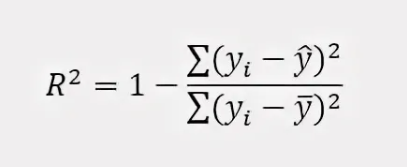

In [47]:
# метрика r2
r2_score(model.predict(X_test), y_test)

1.0

вывожу точность 

### Accuracy

$$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 1.0


## SVM 

обучение модели SVM

In [49]:
model = make_pipeline(StandardScaler(), SVC())

In [50]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [51]:
y_pred = model.predict(X_test)

эффективность модели

In [52]:
r2_score(model.predict(X_test), y_test)

1.0

выводим точность модели

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 1.0


## KNN


In [54]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59)
# тренируем для knn 
clf_knn = knn.fit(X_train, y_train)

In [55]:
y_knn = clf_knn.predict(X_test)

точность модели 


In [ ]:
from sklearn import metrics

print ('точность модели:', metrics.accuracy_score(y_test, y_knn))

точность модели: 0.9909687851241299


In [ ]:

k_range = scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

TypeError: float() argument must be a string or a real number, not 'KNeighborsClassifier'

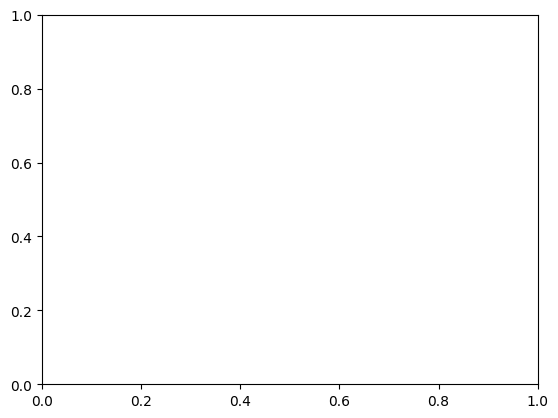

In [ ]:
plt.plot(k_range, scores_list)
plt.xlabel('Адресат')
plt.ylabel('Accuracy')

# 3.2 Гиперпараметрическая оптимизация модели

## поиск гиперпараметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Определение диапазонов значений для случайного поиска
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели и настройка с использованием случайного поиска
rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

### выбор модели 
точность модели 





Random forest :1.0




SVM :1.0



KNN :0.99



как мы видим , точность random forest и svm одинаковая 
из за этого я буду выбирать основываясь на их задачи 


Random Forest (Случайный лес)- Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

Support Vector Machine (SVM)- SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.




Я выберу random forest т.к. эта модель больше подходит к моей задаче , а svm хорошо работает  когда данные не очень объемные , а как я вижу данные у нас достаточно большие 
поэтому
#### я выбираю random forest 

# 3.3 Прогноз классификации для тестовой выборки

# отчет 

В этой сессии мы выбирали модель класификации , такие как - Random Forest , Support Vector Machine (SVM) , KNN

Random Forest (Случайный лес)- Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

Support Vector Machine (SVM)- SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Метод k-ближайших соседей (KNN) — метрический алгоритм для автоматической классификации объектов или регрессии. В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны.



точность модели 


Random forest :1.0

SVM :1.0

KNN :0.99

я выбрал  random forest , т.к. больше подходит под задачу